In [1]:
!pip install xgboost

In [10]:
import xgboost as xgb
from sklearn.linear_model import LinearRegression

import pandas as pd
import numpy as np
from numpy.random import rand, randint, randn
import matplotlib.pyplot as plt
%matplotlib inline

In [77]:
# persist individual files
df_train = pd.read_csv('non_linear_data_train.csv', header=None)
df_val = pd.read_csv('non_linear_data_val.csv', header=None)
df_test = pd.read_csv('non_linear_data_test.csv', header=None)

In [78]:
x_train = df_train.iloc[:,2:].to_numpy()
y_train = df_train.iloc[:,1].to_numpy().reshape(-1,1)

x_val = df_val.iloc[:,2:].to_numpy()
y_val = df_val.iloc[:,1].to_numpy().reshape(-1,1)

x_test = df_test.iloc[:,2:].to_numpy()
y_test = df_test.iloc[:,1].to_numpy().reshape(-1,1)

In [79]:
df_train.head()

,0,1,2
0,347,27010.775694,74.5
1,170,1118.443414,-14.0
2,124,7222.147308,-37.0
3,384,42354.218752,93.0
4,332,21785.153296,67.0


## XGBoost Model

In [80]:
xgbr = xgb.XGBRFRegressor()
xgbr.fit(x_train, y_train, eval_set=[(x_train,y_train),(x_val,y_val)])

#validation-0 is error on training data
#validation-1 is error on val data

[0]	validation_0-rmse:668.44421	validation_1-rmse:845.61352


XGBRFRegressor(base_score=0.5, booster=None, colsample_bylevel=1,
               colsample_bynode=0.8, colsample_bytree=1, gamma=0, gpu_id=-1,
               importance_type='gain', interaction_constraints=None,
               learning_rate=1, max_delta_step=0, max_depth=6,
               min_child_weight=1, missing=nan, monotone_constraints=None,
               n_estimators=100, n_jobs=0, num_parallel_tree=100,
               objective='reg:squarederror', random_state=0, reg_alpha=0,
               reg_lambda=1e-05, scale_pos_weight=1, subsample=0.8,
               tree_method=None, validate_parameters=False, verbosity=None)

In [81]:
#get training values
eval_result = xgbr.evals_result()
eval_result

{'validation_0': {'rmse': [668.444214]},
 'validation_1': {'rmse': [845.613525]}}

In [82]:
# do predictions on test dataset
pred_y = xgbr.predict(x_test)

[]

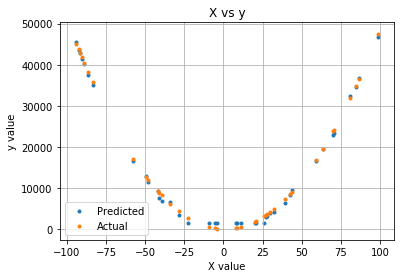

In [83]:
plt.scatter(x_test, pred_y,label='Predicted', marker='.')
plt.scatter(x_test, y_test,label='Actual', marker='.')
plt.grid(True)
plt.xlabel('X value')
plt.ylabel('y value')
plt.title('X vs y')
plt.legend()
plt.plot()

## Linear Model

In [84]:
lm = LinearRegression()
lm.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [85]:
print ('Intercept is {}'.format(lm.intercept_))
print ('Coeffecient is {}'.format(lm.coef_))

Intercept is [16491.70547488]
Coeffecient is [[0.68109997]]


In [86]:
# do predictions on test dataset
lm_pred_y = lm.predict(x_test)

[]

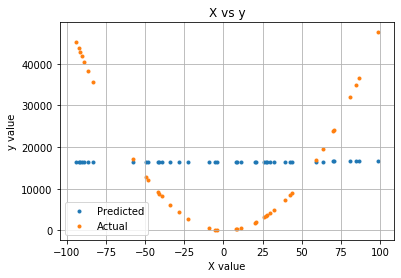

In [87]:
plt.scatter(x_test, lm_pred_y,label='Predicted', marker='.')
plt.scatter(x_test, y_test,label='Actual', marker='.')
plt.grid(True)
plt.xlabel('X value')
plt.ylabel('y value')
plt.title('X vs y')
plt.legend()
plt.plot()

## Feature Engineering for Linear Regression

In [116]:
# persist individual files
df_train = pd.read_csv('non_linear_data_train.csv', header=None)
df_val = pd.read_csv('non_linear_data_val.csv', header=None)
df_test = pd.read_csv('non_linear_data_test.csv', header=None)

In [117]:
df_train.head()

,0,1,2
0,347,27010.775694,74.5
1,170,1118.443414,-14.0
2,124,7222.147308,-37.0
3,384,42354.218752,93.0
4,332,21785.153296,67.0


In [118]:
df_train['2xcub-3xsqr']=2*df_train.iloc[:,2]*df_train.iloc[:,2]*df_train.iloc[:,2]-3*df_train.iloc[:,2]*df_train.iloc[:,2]
df_val['2xcub-3xsqr']=2*df_val.iloc[:,2]*df_val.iloc[:,2]*df_val.iloc[:,2]-3*df_train.iloc[:,2]*df_train.iloc[:,2]
df_test['2xcub-3xsqr']=2*df_test.iloc[:,2]*df_test.iloc[:,2]*df_test.iloc[:,2]-3*df_train.iloc[:,2]*df_train.iloc[:,2]

In [119]:
df_train.head()

,0,1,2,2xcub-3xsqr
0,347,27010.775694,74.5,810336.5
1,170,1118.443414,-14.0,-6076.0
2,124,7222.147308,-37.0,-105413.0
3,384,42354.218752,93.0,1582767.0
4,332,21785.153296,67.0,588059.0


In [120]:
x_train = df_train.iloc[:,2:].to_numpy()
y_train = df_train.iloc[:,1].to_numpy().reshape(-1,1)

x_val = df_val.iloc[:,2:].to_numpy()
y_val = df_val.iloc[:,1].to_numpy().reshape(-1,1)

x_test = df_test.iloc[:,2:].to_numpy()
y_test = df_test.iloc[:,1].to_numpy().reshape(-1,1)

In [121]:
df_test.head()

,0,1,2,2xcub-3xsqr
0,25,38302.310068,-86.5,-1311080.00
1,367,34879.203559,84.5,1206114.25
2,187,209.251330,-5.5,-4439.75
3,153,2772.421487,-22.5,-48728.25
4,285,9029.780113,43.5,151158.75


In [122]:
lm = LinearRegression()
lm.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [125]:
print ('Intercept is {}'.format(lm.intercept_))
print ('Coeffecient is {}'.format(lm.coef_))

Intercept is [16493.82304889]
Coeffecient is [[ 1.52157021e+01 -1.25221716e-03]]


In [123]:
# do predictions on test dataset
lm_pred_y = lm.predict(x_test)

[]

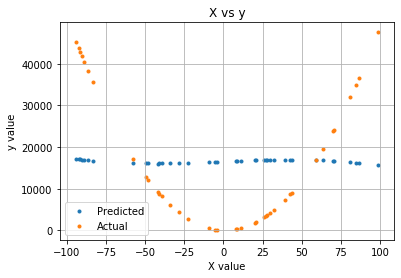

In [124]:
plt.scatter(df_test.iloc[:,2], lm_pred_y,label='Predicted', marker='.')
plt.scatter(df_test.iloc[:,2], y_test,label='Actual', marker='.')
plt.grid(True)
plt.xlabel('X value')
plt.ylabel('y value')
plt.title('X vs y')
plt.legend()
plt.plot()